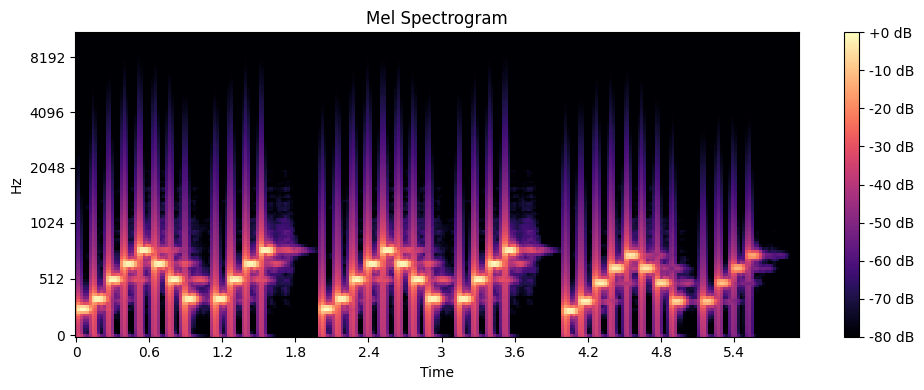

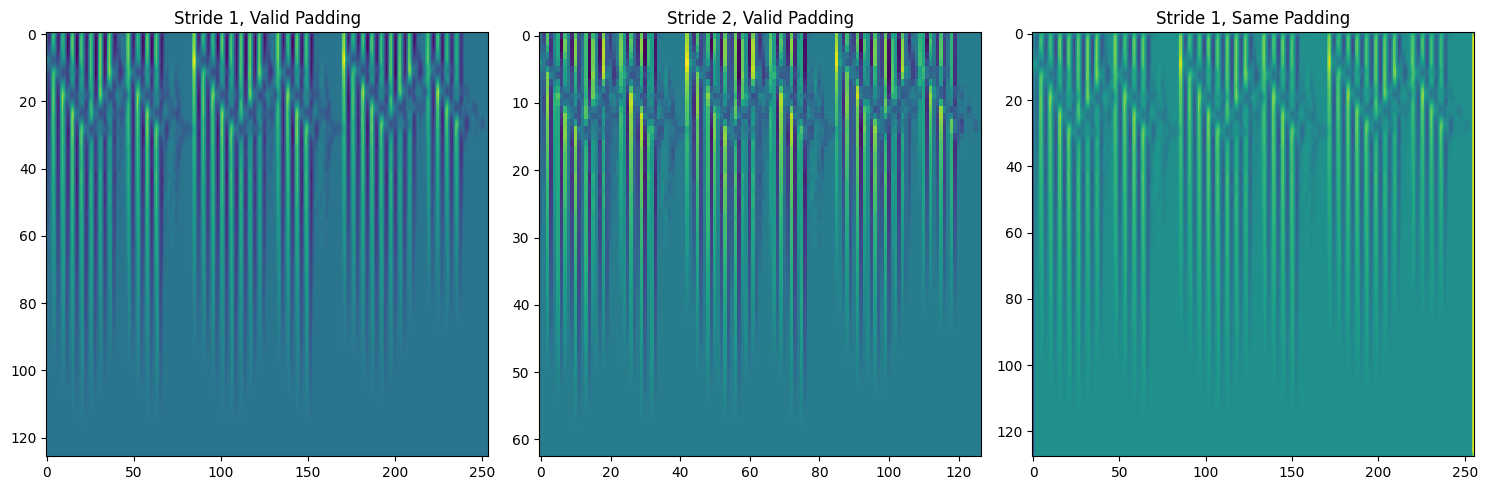

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio_file = '/content/drive/MyDrive/file_example.wav'
y, sr = librosa.load(audio_file)
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

import numpy as np
from scipy.signal import convolve2d

def convolution_layer(input_image, kernel, stride=1, padding='valid'):
    if padding == 'same':
        pad_h = (kernel.shape[0] - 1) // 2
        pad_w = (kernel.shape[1] - 1) // 2
        input_image = np.pad(input_image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output_image = convolve2d(input_image, kernel, mode='valid')[::stride, ::stride]
    return output_image

kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

result_stride_1 = convolution_layer(log_mel_spectrogram, kernel, stride=1, padding='valid')
result_stride_2 = convolution_layer(log_mel_spectrogram, kernel, stride=2, padding='valid')
result_same_padding = convolution_layer(log_mel_spectrogram, kernel, stride=1, padding='same')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Stride 1, Valid Padding')
plt.imshow(result_stride_1, aspect='auto', cmap='viridis')

plt.subplot(1, 3, 2)
plt.title('Stride 2, Valid Padding')
plt.imshow(result_stride_2, aspect='auto', cmap='viridis')

plt.subplot(1, 3, 3)
plt.title('Stride 1, Same Padding')
plt.imshow(result_same_padding, aspect='auto', cmap='viridis')

plt.tight_layout()
plt.show()


In [9]:
!pip install tensorflow tensorflow_hub soundfile librosa

In [10]:
import tensorflow as tf
import tensorflow_hub as hub
import soundfile as sf
import numpy as np
import librosa
import csv

yamnet_model = hub.load('https://tfhub.dev/google/yamnet/1')

def class_names_from_csv(class_map_csv_text):
  class_names = []
  with tf.io.gfile.GFile(class_map_csv_text) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      class_names.append(row['display_name'])
  return class_names

class_map_path = yamnet_model.class_map_path().numpy()
class_names = class_names_from_csv(class_map_path)

In [11]:
def ensure_sample_rate(file_path, desired_sample_rate=16000):
  y, sr = librosa.load(file_path, sr=None)
  if sr != desired_sample_rate:
    y = librosa.resample(y, orig_sr=sr, target_sr=desired_sample_rate)
  return y, desired_sample_rate

def preprocess_audio(file_path):
  waveform, sr = ensure_sample_rate(file_path)
  waveform = tf.convert_to_tensor(waveform, dtype=tf.float32)
  return waveform

In [14]:
def classify_audio(file_path):
  waveform = preprocess_audio(file_path)
  scores, embeddings, spectrogram = yamnet_model(waveform)
  class_scores = scores.numpy().mean(axis=0)
  top_class_index = np.argmax(class_scores)
  top_class_name = class_names[top_class_index]
  return top_class_name, class_scores

audio_path = '/content/drive/MyDrive/file_example.wav'

predicted_label, class_scores = classify_audio(audio_path)
print("Predicted Label:", predicted_label)

Predicted Label: Music


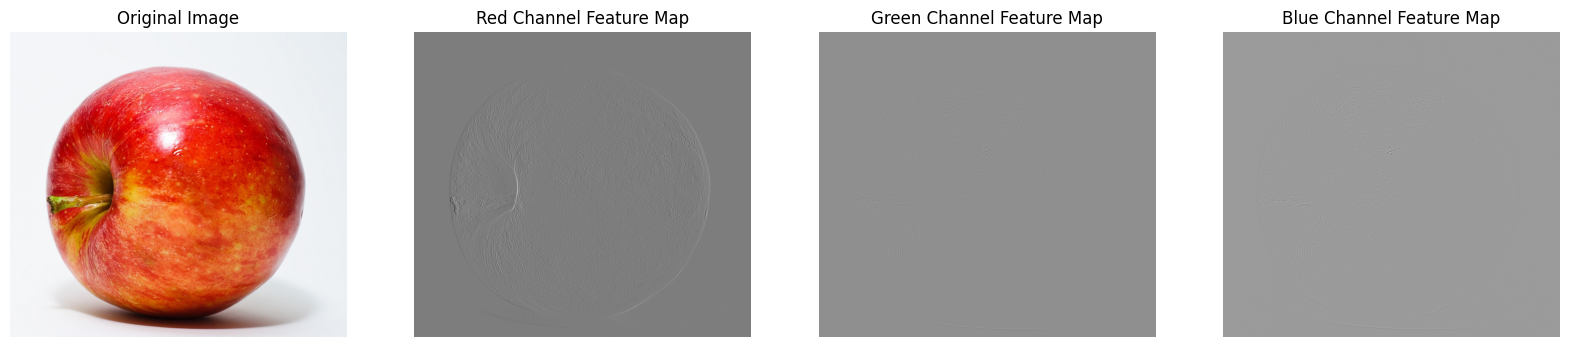

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import cv2

# Load the image
image_path = '/content/drive/MyDrive/Red_Apple.jpg'
color_image = cv2.imread(image_path)
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Extract color channels
red_channel = color_image[:, :, 0]
green_channel = color_image[:, :, 1]
blue_channel = color_image[:, :, 2]

# Define kernels
kernel_1 = np.array([[1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]])

kernel_2 = np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]])

kernel_3 = np.array([[1, 1, 1],
                     [1, -8, 1],
                     [1, 1, 1]])

# Apply convolution operation to each channel
feature_map_1 = convolve2d(red_channel, kernel_1, mode='valid')
feature_map_2 = convolve2d(green_channel, kernel_2, mode='valid')
feature_map_3 = convolve2d(blue_channel, kernel_3, mode='valid')

# Display the original image and feature maps
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(color_image)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Red Channel Feature Map')
plt.imshow(feature_map_1, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Green Channel Feature Map')
plt.imshow(feature_map_2, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Blue Channel Feature Map')
plt.imshow(feature_map_3, cmap='gray')
plt.axis('off')

plt.show()



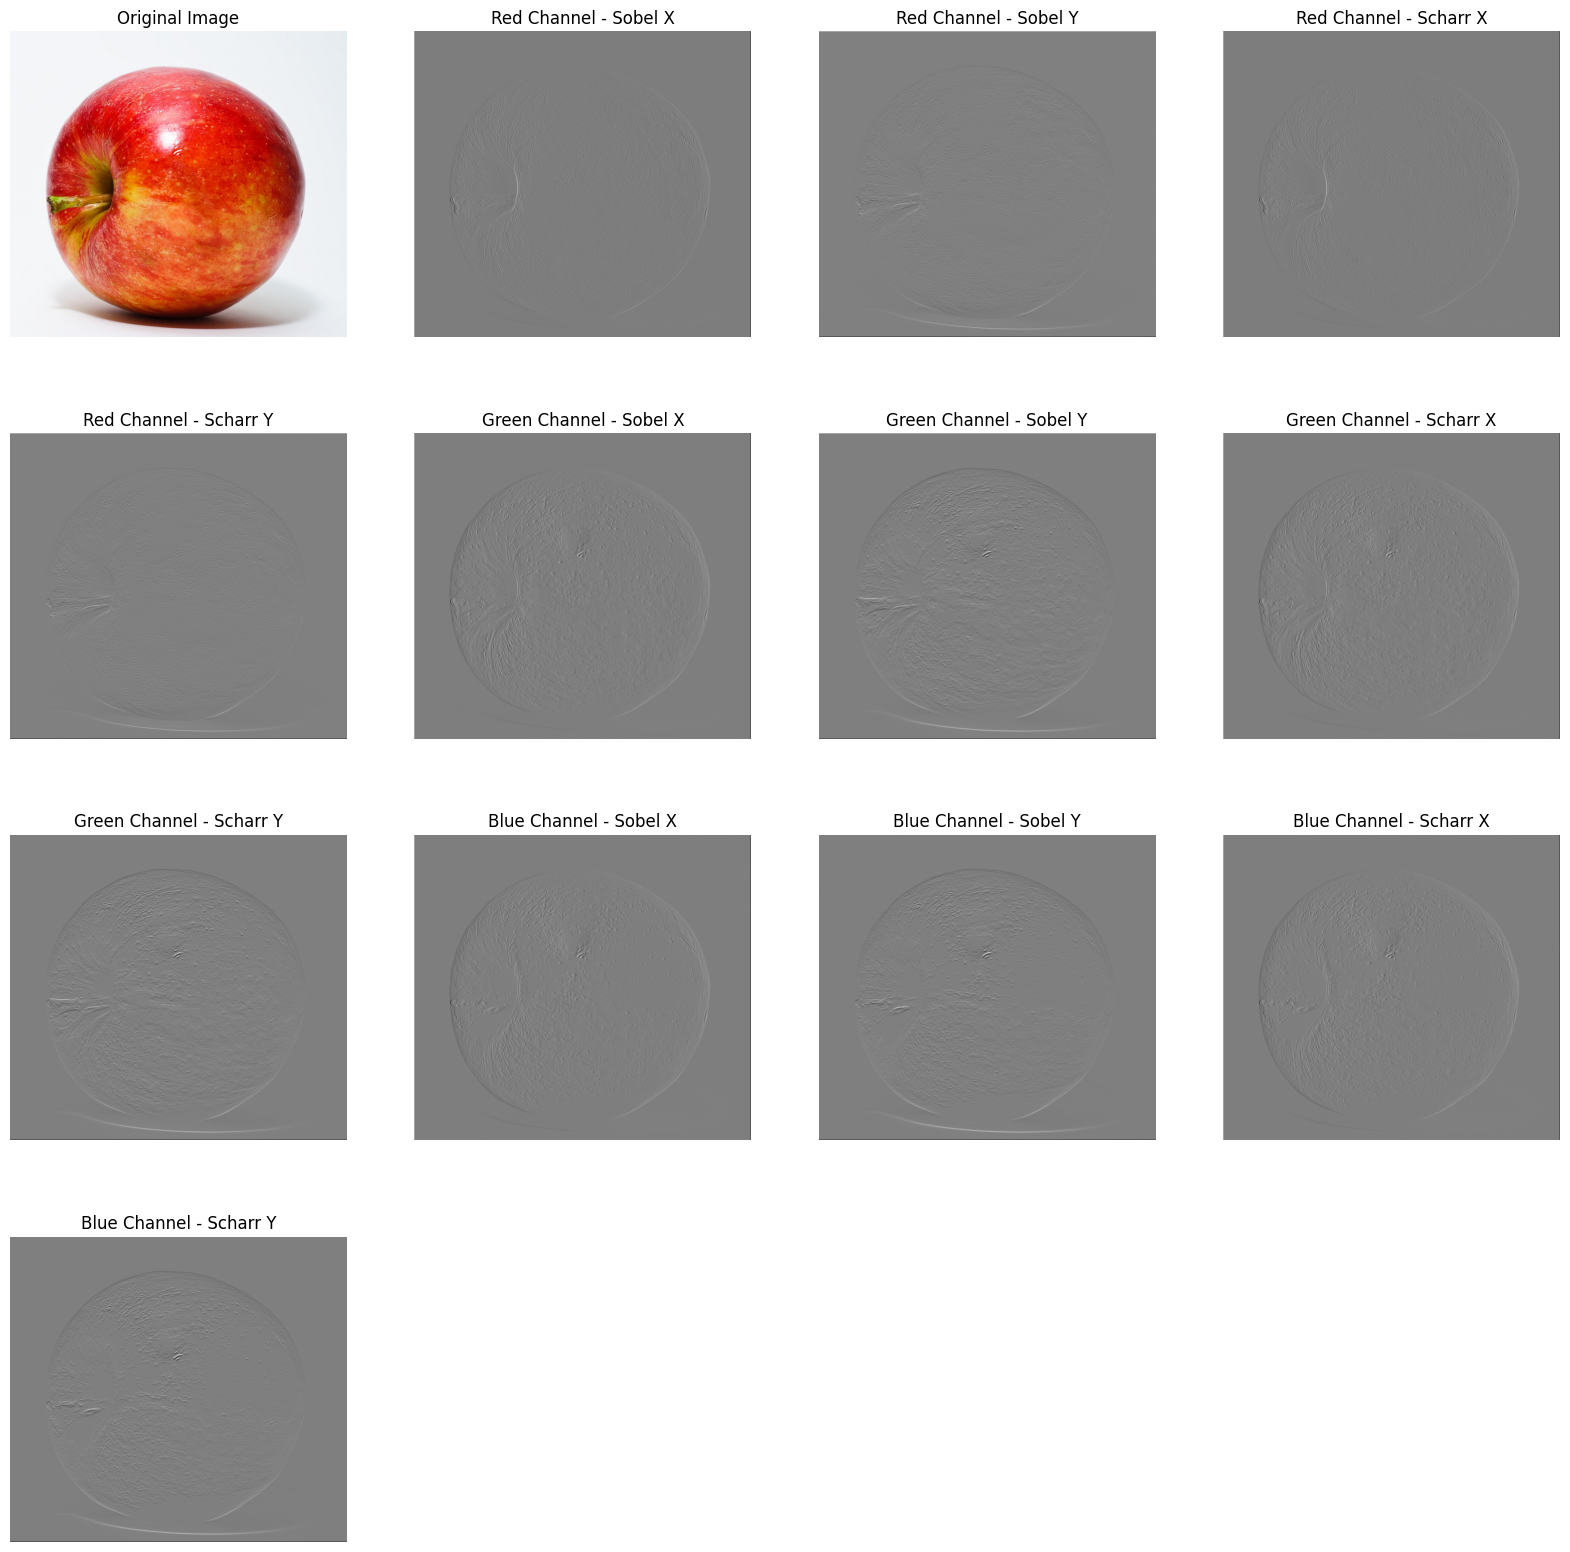

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import cv2

image_path = '/content/drive/MyDrive/Red_Apple.jpg'
color_image = cv2.imread(image_path)
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

red_channel = color_image[:, :, 0]
green_channel = color_image[:, :, 1]
blue_channel = color_image[:, :, 2]

sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

scharr_x = np.array([[3, 0, -3],
                     [10, 0, -10],
                     [3, 0, -3]])

scharr_y = np.array([[3, 10, 3],
                     [0, 0, 0],
                     [-3, -10, -3]])

def apply_convolution(channel, kernel):
    convolved = convolve2d(channel, kernel, mode='same')
    normalized_feature_map = (convolved - convolved.min()) / (convolved.max() - convolved.min())
    return normalized_feature_map

feature_map_red_sobel_x = apply_convolution(red_channel, sobel_x)
feature_map_green_sobel_x = apply_convolution(green_channel, sobel_x)
feature_map_blue_sobel_x = apply_convolution(blue_channel, sobel_x)

feature_map_red_sobel_y = apply_convolution(red_channel, sobel_y)
feature_map_green_sobel_y = apply_convolution(green_channel, sobel_y)
feature_map_blue_sobel_y = apply_convolution(blue_channel, sobel_y)

feature_map_red_scharr_x = apply_convolution(red_channel, scharr_x)
feature_map_green_scharr_x = apply_convolution(green_channel, scharr_x)
feature_map_blue_scharr_x = apply_convolution(blue_channel, scharr_x)

feature_map_red_scharr_y = apply_convolution(red_channel, scharr_y)
feature_map_green_scharr_y = apply_convolution(green_channel, scharr_y)
feature_map_blue_scharr_y = apply_convolution(blue_channel, scharr_y)

plt.figure(figsize=(20, 20))

plt.subplot(4, 4, 1)
plt.title('Original Image')
plt.imshow(color_image)
plt.axis('off')

plt.subplot(4, 4, 2)
plt.title('Red Channel - Sobel X')
plt.imshow(feature_map_red_sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 3)
plt.title('Red Channel - Sobel Y')
plt.imshow(feature_map_red_sobel_y, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 4)
plt.title('Red Channel - Scharr X')
plt.imshow(feature_map_red_scharr_x, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 5)
plt.title('Red Channel - Scharr Y')
plt.imshow(feature_map_red_scharr_y, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 6)
plt.title('Green Channel - Sobel X')
plt.imshow(feature_map_green_sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 7)
plt.title('Green Channel - Sobel Y')
plt.imshow(feature_map_green_sobel_y, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 8)
plt.title('Green Channel - Scharr X')
plt.imshow(feature_map_green_scharr_x, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 9)
plt.title('Green Channel - Scharr Y')
plt.imshow(feature_map_green_scharr_y, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 10)
plt.title('Blue Channel - Sobel X')
plt.imshow(feature_map_blue_sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 11)
plt.title('Blue Channel - Sobel Y')
plt.imshow(feature_map_blue_sobel_y, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 12)
plt.title('Blue Channel - Scharr X')
plt.imshow(feature_map_blue_scharr_x, cmap='gray')
plt.axis('off')

plt.subplot(4, 4, 13)
plt.title('Blue Channel - Scharr Y')
plt.imshow(feature_map_blue_scharr_y, cmap='gray')
plt.axis('off')

plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import cv2
from scipy.stats import pearsonr

image_path = '/content/drive/MyDrive/Red_Apple.jpg'
color_image = cv2.imread(image_path)
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

red_channel = color_image[:, :, 0]
green_channel = color_image[:, :, 1]
blue_channel = color_image[:, :, 2]

kernel_set_1 = [
    np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),
    np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
]

kernel_set_2 = [
    np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),
    np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
]

def apply_convolution(channel, kernel):
    convolved = convolve2d(channel, kernel, mode='same')
    return convolved.flatten()

def get_feature_maps(channel, kernels):
    return [apply_convolution(channel, k) for k in kernels]

red_features_1 = get_feature_maps(red_channel, kernel_set_1)
red_features_2 = get_feature_maps(red_channel, kernel_set_2)
green_features_1 = get_feature_maps(green_channel, kernel_set_1)
green_features_2 = get_feature_maps(green_channel, kernel_set_2)
blue_features_1 = get_feature_maps(blue_channel, kernel_set_1)
blue_features_2 = get_feature_maps(blue_channel, kernel_set_2)

def compute_correlation(set1, set2):
    return [pearsonr(f1, f2)[0] for f1, f2 in zip(set1, set2)]

correlations_red = compute_correlation(red_features_1, red_features_2)
correlations_green = compute_correlation(green_features_1, green_features_2)
correlations_blue = compute_correlation(blue_features_1, blue_features_2)

print("Red Channel Correlations:", correlations_red)
print("Green Channel Correlations:", correlations_green)
print("Blue Channel Correlations:", correlations_blue)


Red Channel Correlations: [0.009957723409120454, -1.0, -1.0]
Green Channel Correlations: [-0.009086869994506171, -0.9999999999999847, -0.9999999999999205]
Blue Channel Correlations: [-0.0069754986315116625, -0.9999999999999543, -0.9999999999998642]


In [21]:
import numpy as np

sequence = [100, 102, 104, 106, 108]

hidden_state = 0
weights_input = 0.5
weight_hidden = 0.5

def rnn(sequence):
  global hidden_state
  outputs = []
  for data_point in sequence:
    hidden_state = weights_input * data_point + weight_hidden * hidden_state
    outputs.append(hidden_state)
  return outputs

outputs = rnn(sequence)

print("Sequence:", sequence)
print("RNN Outputs:", outputs)

Sequence: [100, 102, 104, 106, 108]
RNN Outputs: [50.0, 76.0, 90.0, 98.0, 103.0]


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np

def generate_sequence(n):
  return np.array([i for i in range(n)])

sequence_length = 10
data = generate_sequence(sequence_length + 1)

print("Generated sequence:", data)

X = []
y = []
for i in range(len(data) - 1):
  X.append(data[i])
  y.append(data[i+1])

# [samples, time steps, features]
X = np.array(X).reshape((len(X), 1, 1))
y = np.array(y).reshape((len(y), 1))

print("Reshaped input data (x):", X.shape)
print("Reshaped output data (y):", y.shape)

model = Sequential()
model.add(SimpleRNN(10, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

print("Model summary:")
model.summary()

history = model.fit(X, y, epochs=200, verbose=0)

test_input = np.array([sequence_length]).reshape((1, 1, 1))
predicted_value = model.predict(test_input, verbose=0)

print(f"Test input (last value of the sequence): {test_input[0][0][0]}")
print(f"Predicted next value: {predicted_value[0][0]}")

Generated sequence: [ 0  1  2  3  4  5  6  7  8  9 10]
Reshaped input data (x): (10, 1, 1)
Reshaped output data (y): (10, 1)
Model summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Test input (last value of the sequence): 10
Predicted next value: 8.781793594360352


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

url = 'https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1451606400&period2=1609372800&interval=1d&events=history'
data = pd.read_csv(url)
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        sequences.append((seq, label))
    return sequences

seq_length = 60
sequences = create_sequences(data, seq_length)
train_size = int(len(sequences) * 0.8)
train_sequences = sequences[:train_size]
test_sequences = sequences[train_size:]

train_sequences = [(torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)) for x, y in train_sequences]
test_sequences = [(torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)) for x, y in test_sequences]

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

input_size = 1
hidden_size = 50
num_layers = 2
output_size = 1
model = SimpleRNN(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_sequences, epochs):
    model.train()
    for epoch in range(epochs):
        for seq, label in train_sequences:
            optimizer.zero_grad()
            y_pred = model(seq.unsqueeze(0))
            loss = criterion(y_pred, label.unsqueeze(0))
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

train_model(model, train_sequences, 50)

def evaluate_model(model, test_sequences):
    model.eval()
    predictions = []
    actual = []
    with torch.no_grad():
        for seq, label in test_sequences:
            y_pred = model(seq.unsqueeze(0))
            predictions.append(y_pred.item())
            actual.append(label.item())
    return predictions, actual

predictions, actual = evaluate_model(model, test_sequences)

plt.figure(figsize=(15, 6))
plt.plot(actual, label='Actual Stock Prices', color='blue')
plt.plot(predictions, label='Predicted Stock Prices', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

print("\nExplanation:")
print("The RNN processes sequences of stock prices and predicts the next value based on historical data.")
print("In the plot, you can see how the RNN's predictions follow the actual stock prices, demonstrating its ability to learn from sequential data.")

def predict_future(model, last_sequence, n_steps):
    model.eval()
    predictions = []
    sequence = last_sequence.clone().detach().unsqueeze(0)
    with torch.no_grad():
        for _ in range(n_steps):
            y_pred = model(sequence)
            predictions.append(y_pred.item())
            y_pred = y_pred.unsqueeze(0).unsqueeze(-1)
            sequence = torch.cat((sequence[:, 1:, :], y_pred), dim=1)
    return predictions

last_sequence = torch.tensor(data[-seq_length:], dtype=torch.float32)
future_predictions = predict_future(model, last_sequence, 5)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("\nFuture Predictions (Original Scale):", future_predictions.flatten())


Epoch 0, Loss: 8.805918696452864e-06
Epoch 10, Loss: 6.09681194418954e-07


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

url = 'https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1451606400&period2=1609372800&interval=1d&events=history'
data = pd.read_csv(url)
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        sequences.append((seq, label))
    return sequences

seq_length = 60
sequences = create_sequences(data, seq_length)
train_size = int(len(sequences) * 0.8)
train_sequences = sequences[:train_size]
test_sequences = sequences[train_size:]

train_sequences = [(torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)) for x, y in train_sequences]
test_sequences = [(torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)) for x, y in test_sequences]

class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(SimpleLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

input_size = 1
hidden_size = 50
num_layers = 2
output_size = 1
model = SimpleLSTM(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_sequences, epochs):
    model.train()
    for epoch in range(epochs):
        for seq, label in train_sequences:
            optimizer.zero_grad()
            y_pred = model(seq.unsqueeze(0))
            loss = criterion(y_pred, label.unsqueeze(0))
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

train_model(model, train_sequences, 50)

def evaluate_model(model, test_sequences):
    model.eval()
    predictions = []
    actual = []
    with torch.no_grad():
        for seq, label in test_sequences:
            y_pred = model(seq.unsqueeze(0))
            predictions.append(y_pred.item())
            actual.append(label.item())
    return predictions, actual

predictions, actual = evaluate_model(model, test_sequences)

plt.figure(figsize=(15, 6))
plt.plot(actual, label='Actual Stock Prices', color='blue')
plt.plot(predictions, label='Predicted Stock Prices', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

print("\nExplanation:")
print("The LSTM processes sequences of stock prices and predicts the next value based on historical data.")
print("In the plot, you can see how the LSTM's predictions follow the actual stock prices, demonstrating its ability to learn from sequential data.")

def predict_future(model, last_sequence, n_steps):
    model.eval()
    predictions = []
    sequence = last_sequence.clone().detach().unsqueeze(0)
    with torch.no_grad():
        for _ in range(n_steps):
            y_pred = model(sequence)
            predictions.append(y_pred.item())
            y_pred = y_pred.unsqueeze(0).unsqueeze(-1)
            sequence = torch.cat((sequence[:, 1:, :], y_pred), dim=1)
    return predictions

last_sequence = torch.tensor(data[-seq_length:], dtype=torch.float32)
future_predictions = predict_future(model, last_sequence, 5)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("\nFuture Predictions (Original Scale):", future_predictions.flatten())
